In [1]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
Data = pd.read_excel('RPAmodelUse.xlsx')
Data

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
0,2021-10-03,Sunday,2563,3992,2159,2283,1908,0,0,4262,2114,1908,3840,631.020863,924,6765,5159,0,2294,4616,3684,4131,2633,1856,1828,844.000000,1597.000000,35474.0
1,2021-10-04,Monday,2585,3918,2190,2357,1913,0,0,4261,2205,1913,3889,596.958762,867,7119,5528,0,2467,4925,3691,4034,2618,1811,1880,828.000000,1595.000000,41800.0
2,2021-10-05,Tuesday,2689,3956,2281,2394,1926,0,0,4260,2222,1902,3864,572.318915,874,7321,5491,0,2537,4998,3632,3926,2561,1820,1812,830.000000,1575.000000,43100.0
3,2021-10-06,Wednesday,2763,4033,2557,2554,1966,0,0,4442,2317,2087,3784,576.840979,1059,7577,5752,0,2618,5115,3896,4107,2636,2064,1832,863.256198,1635.600812,44800.0
4,2021-10-07,Thursday,2927,4342,2885,2715,2069,0,0,4710,2501,2451,3494,612.863155,1243,7867,6157,0,2734,5139,4450,4528,2826,2550,1900,1161.798198,1855.555799,47300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,Tuesday,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.000000,2521.000000,NaN
724,2023-09-27,Wednesday,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.000000,2369.000000,NaN
725,2023-09-28,Thursday,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.000000,2253.000000,NaN
726,2023-09-29,Friday,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.000000,2159.000000,NaN


In [3]:
zero_values = Data[Data == 0]
#print(zero_values)
Missing = (Data == 0).sum(axis=0)
Missing[Missing > 0]



FW         6
POR       11
POFQ      25
AS Sp    179
dtype: int64

In [4]:
zero_values = Data[Data == 0]
Missing = (Data == 0).sum(axis=1)
rows_to_drop = Missing[Missing > 0].index

Data = Data.drop(rows_to_drop)
Data

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
179,2022-03-31,Thursday,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,5297,4753,2806,3410,1887,1753.091873,1816.312997,52900.0
180,2022-04-01,Friday,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,5218,4716,2766,3381,1837,1875.202847,1976.627219,53300.0
181,2022-04-02,Saturday,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,5148,4654,2751,3317,1831,1320.034237,1757.000000,53800.0
182,2022-04-03,Sunday,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,5249,4725,2750,3366,1883,960.000000,1795.000000,58000.0
183,2022-04-04,Monday,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,5371,4656,2756,3448,1923,961.000000,1800.000000,58900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,Tuesday,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.000000,2521.000000,NaN
724,2023-09-27,Wednesday,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.000000,2369.000000,NaN
725,2023-09-28,Thursday,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.000000,2253.000000,NaN
726,2023-09-29,Friday,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.000000,2159.000000,NaN


In [5]:
####DID NOT AFFECT RESULTS####

#percentile_25 = Data.quantile(0.25, axis=1)

# Replace the zero values with the 25th percentile
#Data = Data.mask(Data == 0, percentile_25, axis=0)

# Print the updated dataframe
#print(Data)

##############################

In [6]:
one_hot_encoded = pd.get_dummies(Data['DOW'])

# Concatenate the one-hot encoded columns to the 'Data' DataFrame
Data = pd.concat([Data, one_hot_encoded], axis=1)

# Drop the original categorical column if needed
Data = Data.drop('DOW', axis=1)

Data

,Date,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,2022-03-31,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,5297,4753,2806,3410,1887,1753.091873,1816.312997,52900.0,0,0,0,0,1,0,0
180,2022-04-01,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,5218,4716,2766,3381,1837,1875.202847,1976.627219,53300.0,1,0,0,0,0,0,0
181,2022-04-02,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,5148,4654,2751,3317,1831,1320.034237,1757.000000,53800.0,0,0,1,0,0,0,0
182,2022-04-03,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,5249,4725,2750,3366,1883,960.000000,1795.000000,58000.0,0,0,0,1,0,0,0
183,2022-04-04,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,5371,4656,2756,3448,1923,961.000000,1800.000000,58900.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.000000,2521.000000,NaN,0,0,0,0,0,1,0
724,2023-09-27,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.000000,2369.000000,NaN,0,0,0,0,0,0,1
725,2023-09-28,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.000000,2253.000000,NaN,0,0,0,0,1,0,0
726,2023-09-29,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.000000,2159.000000,NaN,1,0,0,0,0,0,0


In [7]:
Data = Data.drop('Date', axis = 1)
Data = Data.drop('AKL', axis=1)
Data = Data.drop('SW', axis=1)
Data = Data.drop('DO', axis=1)

Data

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,52900.0,0,0,0,0,1,0,0
180,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,53300.0,1,0,0,0,0,0,0
181,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,53800.0,0,0,1,0,0,0,0
182,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,58000.0,0,0,0,1,0,0,0
183,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,58900.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4412,2631,3044,1875,NaN,0,0,0,0,0,1,0
724,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4477,2621,3010,1883,NaN,0,0,0,0,0,0,1
725,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4475,2685,3019,1881,NaN,0,0,0,0,1,0,0
726,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4110,2444,2827,1787,NaN,1,0,0,0,0,0,0


In [8]:
column_names = list(Data.columns)

# Remove the 'Fcast' column from the list
column_names.remove('Fcast')

# Move the 'Fcast' column to the front
column_names = ['Fcast'] + column_names

# Reorder the DataFrame columns
Data = Data[column_names]

Data

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,NaN,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4412,2631,3044,1875,0,0,0,0,0,1,0
724,NaN,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4477,2621,3010,1883,0,0,0,0,0,0,1
725,NaN,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4475,2685,3019,1881,0,0,0,0,1,0,0
726,NaN,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4110,2444,2827,1787,1,0,0,0,0,0,0


In [9]:
#####LITTLE CHANGE######

# Create new columns for each column in columns_to_check indicating if the resort is closed (1 for closed, 0 for not closed)
#for column in Data.columns[1:22]:
    #Data[column + '_closed'] = (Data[column] == 0).astype(int)
#Data

########################

In [10]:
Data_missing_values = Data.isnull()  # or df.isna()

# Count the number of missing values in each column
Data_missing_counts = Data_missing_values.sum()

# Display the missing value counts
print(Data_missing_counts)

Fcast        77
CO            0
FW            0
GF            0
PL            0
WL            0
POR           0
POFQ          0
CS            0
BC            0
BW            0
CB            0
RV            0
YC            0
PC            0
DAAR          0
AS Sp         0
AS Mu         0
AS Mo         0
SS            0
OKW           0
JAM           0
KID           0
Friday        0
Monday        0
Saturday      0
Sunday        0
Thursday      0
Tuesday       0
Wednesday     0
dtype: int64


In [11]:
Data_clean = Data.dropna()
Data_clean

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,42400.0,3753,3455,2413,2868,2255,3361,2116,4076,2322,2418,4429,2212.000000,1335,6273,5298,3334,4637,5135,4207,3122,2737,1927,0,0,0,0,0,1,0
647,41700.0,3900,3384,2739,2790,2231,3229,2085,4254,2232,2451,4426,2236.000000,1365,6215,5359,3141,4485,5230,3639,2844,2678,1930,0,0,0,0,0,0,1
648,41400.0,3800,3582,2712,2827,2166,3259,2097,4393,2199,2391,4410,2265.000000,1609,6121,5356,3130,4136,5320,3400,2748,2732,1852,0,0,0,0,1,0,0
649,40300.0,3799,3763,2706,2764,2149,3200,2118,3491,2166,2357,4373,2135.000000,1614,5606,5193,3016,3953,5329,3288,2601,2800,1831,1,0,0,0,0,0,0


In [12]:
Data_clean_missing_values = Data_clean.isnull()

Data_clean_missing_counts = Data_clean_missing_values.sum()

print(Data_clean_missing_counts)

Fcast        0
CO           0
FW           0
GF           0
PL           0
WL           0
POR          0
POFQ         0
CS           0
BC           0
BW           0
CB           0
RV           0
YC           0
PC           0
DAAR         0
AS Sp        0
AS Mu        0
AS Mo        0
SS           0
OKW          0
JAM          0
KID          0
Friday       0
Monday       0
Saturday     0
Sunday       0
Thursday     0
Tuesday      0
Wednesday    0
dtype: int64


In [13]:
Zscoredata = Data_clean.apply(zscore)
Zscoredata

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,0.277564,-3.542092,0.550883,-1.582353,0.828727,1.064248,1.281338,0.677022,0.852454,0.999369,0.858884,1.374849,1.869414,-0.304499,0.504959,1.262896,-3.107630,0.792288,0.883653,0.470550,0.173302,0.831541,-0.106838,-0.413345,-0.406202,-0.413345,-0.406202,2.440333,-0.406202,-0.402610
180,0.348006,-3.366960,0.673604,-0.176918,0.798740,1.005743,1.149340,0.410303,1.210405,0.996354,0.841590,1.268034,1.893225,-0.218638,0.366838,1.125928,-2.035220,0.589968,0.632581,0.393538,-0.013283,0.752268,-0.624798,2.419285,-0.406202,-0.413345,-0.406202,-0.409780,-0.406202,-0.402610
181,0.436058,-1.286225,0.742447,-0.102948,0.624820,0.876197,1.131870,0.527221,1.155498,0.930009,0.858884,1.202127,1.858993,0.050652,0.207699,0.997838,-1.790199,0.584399,0.311935,0.264491,-0.083253,0.577320,-0.686954,-0.413345,-0.406202,2.419285,-0.406202,-0.409780,-0.406202,-0.402610
182,1.175694,-0.927621,0.877141,0.036773,1.182564,0.884555,1.358984,0.808555,1.321274,0.384174,0.982824,1.281670,1.039217,-0.671358,0.598040,1.233727,-1.659994,0.324539,-0.060136,0.412271,-0.087917,0.711265,-0.148275,-0.413345,-0.406202,-0.413345,2.461830,-0.409780,-0.406202,-0.402610
183,1.334188,-0.773338,0.911563,-0.213903,1.008644,1.089321,1.526893,1.093543,1.282206,0.504800,1.115410,1.529390,1.008483,-0.523053,1.212075,1.316161,-1.604361,0.532427,0.378484,0.268653,-0.059929,0.935416,0.266094,-0.413345,2.461830,-0.413345,-0.406202,-0.409780,-0.406202,-0.402610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,-1.571528,0.940453,-0.724218,-0.094729,0.702785,0.215931,-1.658524,-1.423849,-0.906681,-0.743685,0.273776,0.365790,-0.445883,-1.221647,-1.574355,-1.217741,0.057520,-0.048547,-0.392882,-0.665899,1.647323,-1.008143,0.307531,-0.413345,-0.406202,-0.413345,-0.406202,-0.409780,2.461830,-0.402610
647,-1.694800,1.553415,-0.830477,1.244954,0.234999,0.115637,-1.786640,-1.537113,-0.718730,-1.015095,0.368892,0.358972,-0.416252,-1.104564,-1.661431,-1.140380,-0.170929,-0.330681,-0.105510,-1.848138,0.350557,-1.169423,0.338608,-0.413345,-0.406202,-0.413345,-0.406202,-0.409780,-0.406202,2.483794
648,-1.747632,1.136434,-0.534150,1.133999,0.456897,-0.155991,-1.757522,-1.493269,-0.571960,-1.114612,0.195954,0.322610,-0.380449,-0.152291,-1.802554,-1.144184,-0.183950,-0.978476,0.166737,-2.345595,-0.097246,-1.021811,-0.469410,-0.413345,-0.406202,-0.413345,-0.406202,2.440333,-0.406202,-0.402610
649,-1.941346,1.132264,-0.263266,1.109342,0.079071,-0.227033,-1.814786,-1.416541,-1.524384,-1.214129,0.097955,0.238521,-0.540948,-0.132777,-2.575728,-1.350904,-0.318889,-1.318150,0.193961,-2.578712,-0.782946,-0.835929,-0.686954,2.419285,-0.406202,-0.413345,-0.406202,-0.409780,-0.406202,-0.402610


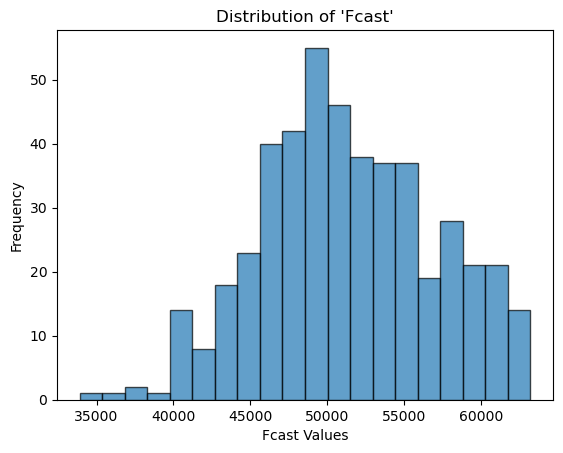

In [14]:
fcast = Data_clean['Fcast']

# Creating the bar chart
plt.hist(fcast, bins=20, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

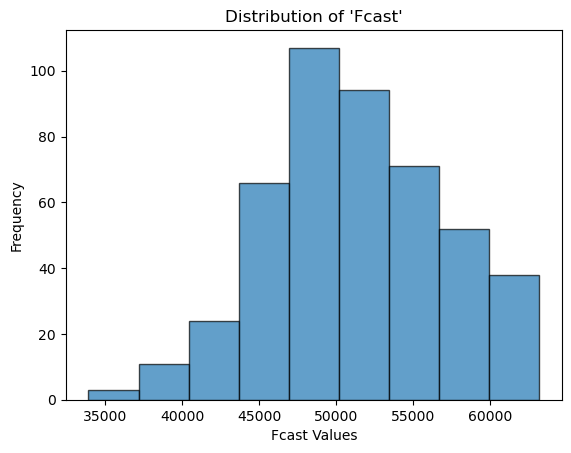

Sturges' Formula bins: 9
Freedman-Diaconis Rule bins: 15


In [15]:
N = len(fcast)
data_range = np.ptp(fcast)

# Calculate the optimal number of bins using Sturges' Formula
sturges_bins = int(np.ceil(np.log2(N + 1)))

# Calculate the optimal number of bins using the Freedman-Diaconis Rule
iqr = stats.iqr(fcast)
fd_bins = int(np.ceil(data_range / (2 * (iqr / (N ** (1/3))))))

# Creating the bar chart
plt.hist(fcast, bins=sturges_bins, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

# Print the number of bins calculated using different methods
print("Sturges' Formula bins:", sturges_bins)
print("Freedman-Diaconis Rule bins:", fd_bins)

In [16]:
filtered_df = Data_clean[Data_clean['Fcast'] < 40000]

# Display the filtered rows
print(filtered_df)

       Fcast    CO    FW    GF    PL    WL   POR  POFQ    CS    BC    BW  \
331  37700.0  3343  2119  2081  2693  1897  2273  1625  2561  2299  2166   
332  36700.0  3170  2371  2067  2630  1888  2117  1574  2390  2261  2091   
333  39800.0  3389  3471  2200  2700  2052  2416  1857  2467  2419  2230   
497  37054.0  3481  3248  2148  2615  1930  5609  2494  5464  2393  1843   
498  33900.0  3394  3003  2081  2605  1877  4851  2294  4132  2365  1759   
574  39966.0  3170  2819  2323  2547  2154  4749  2338  6318  2226  1740   
650  39100.0  3668  3623  2740  2710  2083  3230  2083  3423  2189  2332   

       CB      RV    YC    PC  DAAR  AS Sp  AS Mu  AS Mo    SS   OKW   JAM  \
331  2588  1525.0  1522  5327  3897   1723   4467   4984  3135  2103  2324   
332  2319  1509.0  1554  5056  3780   1597   4219   4810  3229  2243  2329   
333  2565  1554.0  1592  5664  4293   2085   4533   5042  3678  2289  2557   
497  4513  2046.0  1353  7739  6577   4620   5139   5729  4404  2590  2770   
4

In [17]:
filtered_df = Data_clean.drop(Data_clean[Data_clean['Fcast'] < 40000].index)

filtered_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,40200.0,3408,3248,2279,2830,2203,3356,2024,3005,2252,2237,4407,2165.000000,1289,6092,4953,3752,4454,5226,3584,2769,2651,1808,0,1,0,0,0,0,0
646,42400.0,3753,3455,2413,2868,2255,3361,2116,4076,2322,2418,4429,2212.000000,1335,6273,5298,3334,4637,5135,4207,3122,2737,1927,0,0,0,0,0,1,0
647,41700.0,3900,3384,2739,2790,2231,3229,2085,4254,2232,2451,4426,2236.000000,1365,6215,5359,3141,4485,5230,3639,2844,2678,1930,0,0,0,0,0,0,1
648,41400.0,3800,3582,2712,2827,2166,3259,2097,4393,2199,2391,4410,2265.000000,1609,6121,5356,3130,4136,5320,3400,2748,2732,1852,0,0,0,0,1,0,0


In [18]:
num_bootstrap_samples = 7

# Create an empty DataFrame to store the bootstrap samples
bootstrap_df = pd.DataFrame()

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Sample with replacement from the DataFrame
    bootstrap_sample = filtered_df.sample(n=len(filtered_df), replace=True)
    
    # Concatenate the bootstrap sample with the bootstrap DataFrame
    bootstrap_df = pd.concat([bootstrap_df, bootstrap_sample], ignore_index=True)

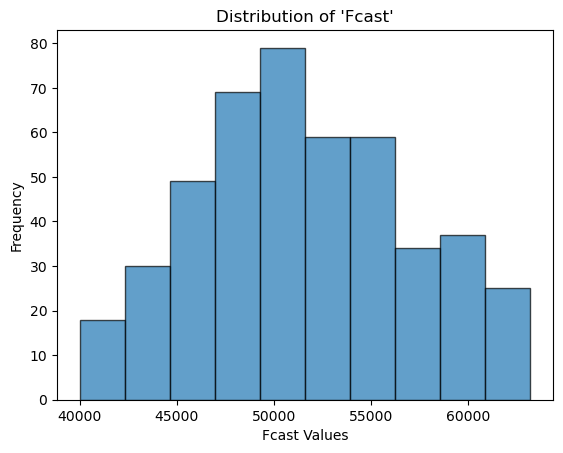

In [19]:
fcast = filtered_df['Fcast']

# Creating the bar chart
plt.hist(fcast, bins=10, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

In [20]:
print(bootstrap_df)

        Fcast    CO    FW    GF    PL    WL   POR  POFQ    CS    BC    BW  \
0     46800.0  3161  3254  2054  2684  1681  3956  2129  4312  2431  1809   
1     53300.0  3601  4234  2164  2744  1986  6023  2553  5788  2425  2135   
2     54801.0  3854  3793  2857  2767  2218  6582  2822  6058  2638  2680   
3     61600.0  3871  4966  2829  2858  2246  6245  2689  6379  2918  2660   
4     59839.0  3823  5068  2612  2981  2524  6222  2883  6820  3017  2801   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3208  58300.0  3371  3244  2423  2527  1980  5383  2494  4543  2624  2302   
3209  43335.0  3124  2472  2099  2617  2161  2614  2060  4211  2000  1962   
3210  48500.0  3260  3275  2346  2528  1826  4066  2206  4579  2293  1829   
3211  62200.0  3929  4867  2902  2901  2300  6503  2775  6473  2933  2763   
3212  55300.0  3713  2963  2624  2915  2318  4868  2619  4177  3004  2740   

        CB           RV    YC    PC  DAAR  AS Sp  AS Mu  AS Mo    SS   OKW 

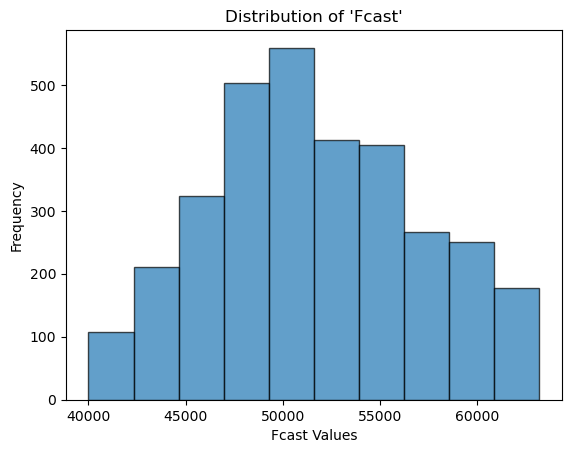

Normality test p-value: 5.263966820514205e-35
The data does not follow a normal distribution.


In [21]:
fcast = bootstrap_df['Fcast']

# Creating a histogram
plt.hist(fcast, bins=10, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the histogram
plt.show()

# Perform a normality test
stat, p_value = stats.normaltest(fcast)

# Set the significance level
alpha = 0.05

# Print the results
print("Normality test p-value:", p_value)
if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

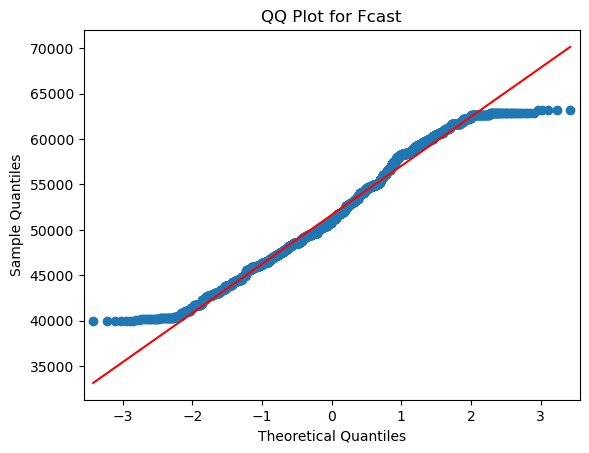

In [22]:
fcast_values = np.array(bootstrap_df['Fcast'])
sm.qqplot(fcast_values, line='s')
plt.title('QQ Plot for Fcast')
plt.show()

In [23]:
filtered_df = bootstrap_df

In [24]:
######TEST DATASPLIT AND MODELS#######

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=1)

In [26]:
train_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
47,48289.0,3661,4958,2707,2889,1934,6294,2804,5642,3015,2547,4322,2086.000000,1871,8247,7273,4390,5115,5610,5176,3135,3030,2010,0,0,0,1,0,0,0
1776,53100.0,3823,4567,2646,2923,2460,5010,2556,4192,2922,2810,4570,3188.058907,1642,7066,5532,3098,5048,6109,4985,3047,3572,2029,0,1,0,0,0,0,0
921,49400.0,3436,3803,2650,2802,2390,5209,2271,5241,2220,2494,4330,2100.000000,1975,8074,6018,2368,3989,5066,4401,2848,3118,1863,0,0,1,0,0,0,0
2920,58300.0,3371,3244,2423,2527,1980,5383,2494,4543,2624,2302,3801,2087.000000,1505,7325,6763,3608,4404,5104,4769,2675,2925,1810,0,0,0,0,0,0,1
58,58400.0,3556,4006,2616,2871,2416,4496,2553,4389,2133,2298,4808,2271.000000,1582,8005,6669,2846,4547,5508,4800,2963,3047,2020,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,40100.0,3369,2266,2115,2762,1946,2514,1774,2781,2397,2305,2828,1514.000000,1536,5708,4308,1888,4549,5216,3374,2148,2492,1810,0,1,0,0,0,0,0
905,59648.0,3650,4794,2370,2872,2466,6606,2889,6310,2481,1859,4430,2246.000000,1615,8404,7440,5039,5282,5604,5013,2940,3465,1936,0,1,0,0,0,0,0
1096,40283.0,3415,2702,2218,2759,2045,2802,1994,3368,2599,2381,2990,1574.000000,1668,6017,4729,2087,4598,5264,3612,2273,2695,1836,0,0,0,1,0,0,0
235,46000.0,3251,2517,2127,2518,2125,2991,2261,4733,1947,2082,3762,1947.000000,1465,7152,5060,3903,4363,5070,3789,2535,2278,1737,0,0,0,0,1,0,0


In [27]:
test_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1721,54948.0,3371,4083,2181,2558,2292,5441,2368,5461,2376,2507,4279,3900.397541,1467,7357,6086,3276,4634,5144,4230,2686,2993,1817,1,0,0,0,0,0,0
2746,40000.0,3317,3160,2249,2800,2140,4127,2016,3365,2248,2265,4407,2101.000000,1286,6003,4558,3767,4266,5024,3264,2679,2622,1811,0,0,0,1,0,0,0
171,54300.0,3571,5020,2686,3063,2439,5344,2886,5561,3018,2828,4371,3895.458339,1714,6792,4586,2825,4607,5704,5151,3086,3478,2101,0,0,1,0,0,0,0
2371,43000.0,3197,2555,2258,2577,2173,4608,2382,4887,2289,1816,3976,1724.000000,1299,7255,6199,3056,2909,5089,3842,2591,2959,1778,0,0,0,0,0,0,1
700,43000.0,3197,2555,2258,2577,2173,4608,2382,4887,2289,1816,3976,1724.000000,1299,7255,6199,3056,2909,5089,3842,2591,2959,1778,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,50400.0,3677,4771,2540,2909,2371,4644,2676,4499,2697,2649,4341,3768.093576,1638,6091,4801,2959,5310,5814,4990,2862,3364,1983,0,0,1,0,0,0,0
1263,49700.0,3494,4119,2479,2681,2344,5387,2599,4988,2790,2409,4281,1727.000000,1801,6905,6592,3297,4643,5174,4487,2641,3274,1809,0,0,1,0,0,0,0
979,50400.0,3937,3779,2657,2917,2414,3876,2135,3598,3000,2702,4354,3515.149048,1900,5596,4891,1655,4937,5626,5091,3001,3444,2000,0,0,0,0,0,1,0
2163,50400.0,3677,4771,2540,2909,2371,4644,2676,4499,2697,2649,4341,3768.093576,1638,6091,4801,2959,5310,5814,4990,2862,3364,1983,0,0,1,0,0,0,0


In [28]:
X_train=train_df.copy()
X_train.drop(['Fcast'], axis=1, inplace=True)
Y_train=train_df[['Fcast']].copy()
X_test=test_df.copy()
X_test.drop(['Fcast'], axis=1, inplace=True)
Y_test=test_df[['Fcast']].copy()

In [29]:
X_train

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
47,3661,4958,2707,2889,1934,6294,2804,5642,3015,2547,4322,2086.000000,1871,8247,7273,4390,5115,5610,5176,3135,3030,2010,0,0,0,1,0,0,0
1776,3823,4567,2646,2923,2460,5010,2556,4192,2922,2810,4570,3188.058907,1642,7066,5532,3098,5048,6109,4985,3047,3572,2029,0,1,0,0,0,0,0
921,3436,3803,2650,2802,2390,5209,2271,5241,2220,2494,4330,2100.000000,1975,8074,6018,2368,3989,5066,4401,2848,3118,1863,0,0,1,0,0,0,0
2920,3371,3244,2423,2527,1980,5383,2494,4543,2624,2302,3801,2087.000000,1505,7325,6763,3608,4404,5104,4769,2675,2925,1810,0,0,0,0,0,0,1
58,3556,4006,2616,2871,2416,4496,2553,4389,2133,2298,4808,2271.000000,1582,8005,6669,2846,4547,5508,4800,2963,3047,2020,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,3369,2266,2115,2762,1946,2514,1774,2781,2397,2305,2828,1514.000000,1536,5708,4308,1888,4549,5216,3374,2148,2492,1810,0,1,0,0,0,0,0
905,3650,4794,2370,2872,2466,6606,2889,6310,2481,1859,4430,2246.000000,1615,8404,7440,5039,5282,5604,5013,2940,3465,1936,0,1,0,0,0,0,0
1096,3415,2702,2218,2759,2045,2802,1994,3368,2599,2381,2990,1574.000000,1668,6017,4729,2087,4598,5264,3612,2273,2695,1836,0,0,0,1,0,0,0
235,3251,2517,2127,2518,2125,2991,2261,4733,1947,2082,3762,1947.000000,1465,7152,5060,3903,4363,5070,3789,2535,2278,1737,0,0,0,0,1,0,0


In [30]:
Y_train

,Fcast
47,48289.0
1776,53100.0
921,49400.0
2920,58300.0
58,58400.0
...,...
2763,40100.0
905,59648.0
1096,40283.0
235,46000.0


In [31]:
X_test

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1721,3371,4083,2181,2558,2292,5441,2368,5461,2376,2507,4279,3900.397541,1467,7357,6086,3276,4634,5144,4230,2686,2993,1817,1,0,0,0,0,0,0
2746,3317,3160,2249,2800,2140,4127,2016,3365,2248,2265,4407,2101.000000,1286,6003,4558,3767,4266,5024,3264,2679,2622,1811,0,0,0,1,0,0,0
171,3571,5020,2686,3063,2439,5344,2886,5561,3018,2828,4371,3895.458339,1714,6792,4586,2825,4607,5704,5151,3086,3478,2101,0,0,1,0,0,0,0
2371,3197,2555,2258,2577,2173,4608,2382,4887,2289,1816,3976,1724.000000,1299,7255,6199,3056,2909,5089,3842,2591,2959,1778,0,0,0,0,0,0,1
700,3197,2555,2258,2577,2173,4608,2382,4887,2289,1816,3976,1724.000000,1299,7255,6199,3056,2909,5089,3842,2591,2959,1778,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,3677,4771,2540,2909,2371,4644,2676,4499,2697,2649,4341,3768.093576,1638,6091,4801,2959,5310,5814,4990,2862,3364,1983,0,0,1,0,0,0,0
1263,3494,4119,2479,2681,2344,5387,2599,4988,2790,2409,4281,1727.000000,1801,6905,6592,3297,4643,5174,4487,2641,3274,1809,0,0,1,0,0,0,0
979,3937,3779,2657,2917,2414,3876,2135,3598,3000,2702,4354,3515.149048,1900,5596,4891,1655,4937,5626,5091,3001,3444,2000,0,0,0,0,0,1,0
2163,3677,4771,2540,2909,2371,4644,2676,4499,2697,2649,4341,3768.093576,1638,6091,4801,2959,5310,5814,4990,2862,3364,1983,0,0,1,0,0,0,0


In [32]:
Y_test

,Fcast
1721,54948.0
2746,40000.0
171,54300.0
2371,43000.0
700,43000.0
...,...
774,50400.0
1263,49700.0
979,50400.0
2163,50400.0


In [33]:
X_train=X_train.values
Y_train=Y_train.values.reshape(-1)
X_test=X_test.values
Y_test=Y_test.values.reshape(-1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

scaler=MinMaxScaler()
#_train_s = scaler.fit_transform(X_train)
#_test_s = scaler.transform(X_test)

#_train_s.shape

In [35]:
#X_train = X_train_s
#X_test = X_test_s

#X_train=X_train_s
#X_test=X_test_s

In [36]:
#idx_list=np.arange(0, X_train.shape[0])
#train_idx=idx_list[0:468]
#val_idx=idx_list[468:]

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [37]:
#Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=150, random_state= 1)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred = model.predict(X_test)
Val_pred = model.predict(X_val)

# Evaluate the model 
KNNMSE = np.mean((Y_test - Y_test_pred)**2)
KNNMAE = np.mean(np.abs(Y_test - Y_test_pred))
KNNMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE = np.mean((Y_val - Val_pred)**2)
KNNMAE = np.mean(np.abs(Y_val - Val_pred))
KNNMAPE =  np.mean(np.abs(Y_val - Val_pred)/Y_val)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE= 119241.68783210652
KNNMAE= 117.52291342664607
KNNMAPE= 0.0023632345213719665
KNNMSE= 93745.4916625162
KNNMAE= 112.42693904020743
KNNMAPE= 0.0022374640429769044


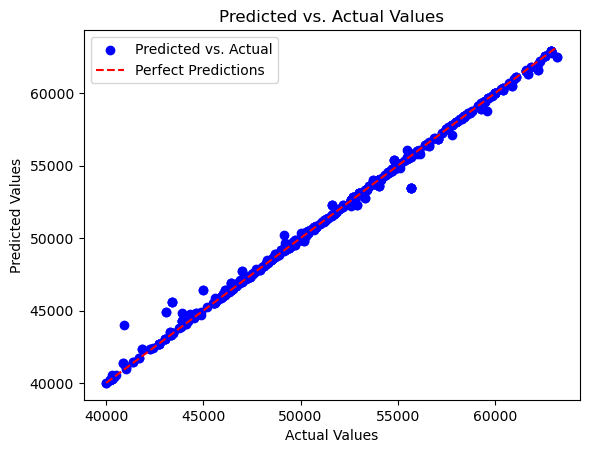

In [38]:
plt.scatter(Y_test, Y_test_pred, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [39]:
#####TEST ON NEW DATASET#####

In [40]:
NewData = pd.read_excel('RPAverification.xlsx')
NewData.head()

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
0,2023-07-16,Sunday,2809,3462,2598,2538,2070,4696,2272,3354,2281,2284,3653,2104,1616,6140,5912,3457,4028,4283,4618,4359,2510,2859,1759,1261,3299,NaN
1,2023-07-17,Monday,2818,3489,2614,2530,2100,4732,2289,3380,2293,2304,3681,2091,1628,6187,5958,3483,4059,4316,4684,4411,2525,2883,1801,1529,3553,NaN
2,2023-07-18,Tuesday,2799,3455,2588,2505,2043,4687,2267,3348,2277,2287,3646,2094,1613,6128,5901,3450,4020,4275,4647,4385,2488,2852,1795,1429,4105,NaN
3,2023-07-19,Wednesday,3084,3829,2853,2771,2279,5194,2512,3710,2513,2545,4040,2296,1787,6791,6539,3823,4455,4737,5066,4921,2818,3142,1924,1422,4078,NaN
4,2023-07-20,Thursday,3108,3871,2894,2805,2323,5251,2540,3751,2524,2565,4085,2290,1807,6865,6611,3865,4504,4789,5119,5013,2868,3178,1941,1470,3989,NaN


In [41]:
one_hot_encoded = pd.get_dummies(NewData['DOW'])

# Concatenate the one-hot encoded columns to the 'Data' DataFrame
NewData = pd.concat([NewData, one_hot_encoded], axis=1)

# Drop the original categorical column if needed
NewData = NewData.drop('DOW', axis=1)

NewData

,Date,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2023-07-16,2809,3462,2598,2538,2070,4696,2272,3354,2281,2284,3653,2104,1616,6140,5912,3457,4028,4283,4618,4359,2510,2859,1759,1261,3299,NaN,0,0,0,1,0,0,0
1,2023-07-17,2818,3489,2614,2530,2100,4732,2289,3380,2293,2304,3681,2091,1628,6187,5958,3483,4059,4316,4684,4411,2525,2883,1801,1529,3553,NaN,0,1,0,0,0,0,0
2,2023-07-18,2799,3455,2588,2505,2043,4687,2267,3348,2277,2287,3646,2094,1613,6128,5901,3450,4020,4275,4647,4385,2488,2852,1795,1429,4105,NaN,0,0,0,0,0,1,0
3,2023-07-19,3084,3829,2853,2771,2279,5194,2512,3710,2513,2545,4040,2296,1787,6791,6539,3823,4455,4737,5066,4921,2818,3142,1924,1422,4078,NaN,0,0,0,0,0,0,1
4,2023-07-20,3108,3871,2894,2805,2323,5251,2540,3751,2524,2565,4085,2290,1807,6865,6611,3865,4504,4789,5119,5013,2868,3178,1941,1470,3989,NaN,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2023-09-26,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346,2521,NaN,0,0,0,0,0,1,0
73,2023-09-27,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232,2369,NaN,0,0,0,0,0,0,1
74,2023-09-28,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122,2253,NaN,0,0,0,0,1,0,0
75,2023-09-29,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962,2159,NaN,1,0,0,0,0,0,0


In [42]:
NewData = NewData.drop('Date', axis = 1)
NewData = NewData.drop('AKL', axis=1)
NewData = NewData.drop('SW', axis=1)
NewData = NewData.drop('DO', axis=1)

NewData

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2809,3462,2598,2538,2070,4696,2272,3354,2281,2284,3653,2104,1616,6140,5912,3457,4028,4283,4359,2510,2859,1759,NaN,0,0,0,1,0,0,0
1,2818,3489,2614,2530,2100,4732,2289,3380,2293,2304,3681,2091,1628,6187,5958,3483,4059,4316,4411,2525,2883,1801,NaN,0,1,0,0,0,0,0
2,2799,3455,2588,2505,2043,4687,2267,3348,2277,2287,3646,2094,1613,6128,5901,3450,4020,4275,4385,2488,2852,1795,NaN,0,0,0,0,0,1,0
3,3084,3829,2853,2771,2279,5194,2512,3710,2513,2545,4040,2296,1787,6791,6539,3823,4455,4737,4921,2818,3142,1924,NaN,0,0,0,0,0,0,1
4,3108,3871,2894,2805,2323,5251,2540,3751,2524,2565,4085,2290,1807,6865,6611,3865,4504,4789,5013,2868,3178,1941,NaN,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599,1327,6639,6645,3523,4826,5107,4412,2631,3044,1875,NaN,0,0,0,0,0,1,0
73,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563,1311,6556,6562,3479,4766,5043,4477,2621,3010,1883,NaN,0,0,0,0,0,0,1
74,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576,1319,6597,6603,3501,4796,5075,4475,2685,3019,1881,NaN,0,0,0,0,1,0,0
75,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419,1231,6158,6164,3268,4477,4737,4110,2444,2827,1787,NaN,1,0,0,0,0,0,0


In [43]:
column_names = list(NewData.columns)

# Remove the 'Fcast' column from the list
column_names.remove('Fcast')

# Move the 'Fcast' column to the front
column_names = ['Fcast'] + column_names

# Reorder the DataFrame columns
NewData = NewData[column_names]

NewData

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,NaN,2809,3462,2598,2538,2070,4696,2272,3354,2281,2284,3653,2104,1616,6140,5912,3457,4028,4283,4359,2510,2859,1759,0,0,0,1,0,0,0
1,NaN,2818,3489,2614,2530,2100,4732,2289,3380,2293,2304,3681,2091,1628,6187,5958,3483,4059,4316,4411,2525,2883,1801,0,1,0,0,0,0,0
2,NaN,2799,3455,2588,2505,2043,4687,2267,3348,2277,2287,3646,2094,1613,6128,5901,3450,4020,4275,4385,2488,2852,1795,0,0,0,0,0,1,0
3,NaN,3084,3829,2853,2771,2279,5194,2512,3710,2513,2545,4040,2296,1787,6791,6539,3823,4455,4737,4921,2818,3142,1924,0,0,0,0,0,0,1
4,NaN,3108,3871,2894,2805,2323,5251,2540,3751,2524,2565,4085,2290,1807,6865,6611,3865,4504,4789,5013,2868,3178,1941,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599,1327,6639,6645,3523,4826,5107,4412,2631,3044,1875,0,0,0,0,0,1,0
73,NaN,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563,1311,6556,6562,3479,4766,5043,4477,2621,3010,1883,0,0,0,0,0,0,1
74,NaN,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576,1319,6597,6603,3501,4796,5075,4475,2685,3019,1881,0,0,0,0,1,0,0
75,NaN,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419,1231,6158,6164,3268,4477,4737,4110,2444,2827,1787,1,0,0,0,0,0,0


In [44]:
X_Verification=NewData.copy()
X_Verification.drop(['Fcast'], axis=1, inplace=True)
X_Verification=X_Verification.values
X_Verification

array([[2809, 3462, 2598, ...,    0,    0,    0],
       [2818, 3489, 2614, ...,    0,    0,    0],
       [2799, 3455, 2588, ...,    0,    1,    0],
       ...,
       [3348, 3681, 2583, ...,    1,    0,    0],
       [3141, 3436, 2435, ...,    0,    0,    0],
       [3299, 3581, 2543, ...,    0,    0,    0]], dtype=int64)

In [45]:
NewPredictions = model.predict(X_Verification)

In [46]:
# Create a range of dates using pandas
start_date = pd.to_datetime('2023-07-16')  # Set the start date
num_predictions = len(NewPredictions)
dates = pd.date_range(start=start_date, periods=num_predictions)

# Create a DataFrame with dates and predictions
Predictions = pd.DataFrame({'Date': dates, 'Prediction': NewPredictions})

# Print the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Predictions

,Date,Prediction
0,2023-07-16,44097.280000
1,2023-07-17,46205.020000
2,2023-07-18,45998.993333
3,2023-07-19,52974.346667
4,2023-07-20,55193.280000
5,2023-07-21,54382.046667
6,2023-07-22,50376.833333
7,2023-07-23,51060.300000
8,2023-07-24,52555.213333
9,2023-07-25,53800.793333


In [47]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(Y_test, dt_preds)

# Evaluate the model 
KNNMSE = np.mean((Y_test - dt_preds)**2)
KNNMAE = np.mean(np.abs(Y_test - dt_preds))
KNNMAPE =  np.mean(np.abs(Y_test - dt_preds)/Y_test)
print('DTMSE=', KNNMSE)
print('DTMAE=', KNNMAE)
print('DTMAPE=', KNNMAPE)

DTMSE= 18679.321928460344
DTMAE= 10.267496111975117
DTMAPE= 0.0001864896135568614


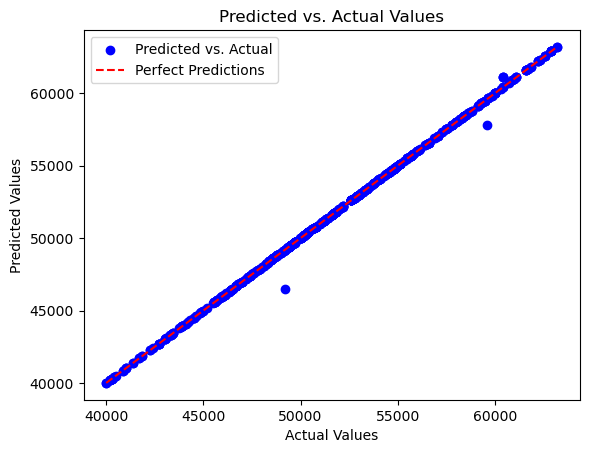

In [48]:
plt.scatter(Y_test, dt_preds, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [52]:
DT_NewPredictions = model.predict(X_Verification)

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'numpy.ndarray'>)

In [ ]:
# Create a range of dates using pandas
start_date = pd.to_datetime('2023-07-16')  # Set the start date
num_predictions = len(DT_NewPredictions)
dates = pd.date_range(start=start_date, periods=num_predictions)

# Create a DataFrame with dates and predictions
DT_Predictions = pd.DataFrame({'Date': dates, 'Prediction': DT_NewPredictions})

# Print the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
DT_Predictions

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task with squared error loss
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
predictions = model.predict(dtest)

# Evaluate the model using RMSE
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
XGMSE = np.mean((Y_test - predictions)**2)
XGMAE = np.mean(np.abs(Y_test - predictions))
XGMAPE =  np.mean(np.abs(Y_test - predictions)/Y_test)
print('XGMSE=', XGMSE)
print('XGMAE=', XGMAE)
print('XGMAPE=', XGMAPE)

Root Mean Squared Error (RMSE): 96.24540966771593
XGMSE= 9263.178882106467
XGMAE= 26.16845475311042
XGMAPE= 0.0005041492282694532


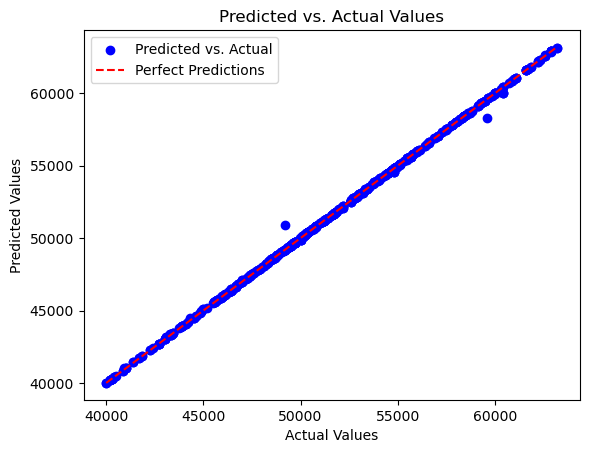

In [50]:
plt.scatter(Y_test, predictions, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [51]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


NameError: name 'layers' is not defined